# Qiskit Functions 入門

<Admonition type="note">
  Qiskit Functionsは、IBM Quantum™ Premium Plan ユーザーのみが利用できる実験的な機能です。プレビュー リリースの状態であり、変更される可能性があります。
</Admonition>


Qiskit Functions は、量子ソフトウェア開発ワークフローの一部を抽象化することで、ユーティリティ規模のアルゴリズムの発見とアプリケーション開発を簡素化および加速します。このようにして、Qiskit Functions は、通常は手動でのコード作成や実験の微調整に費やされる時間を解放します。

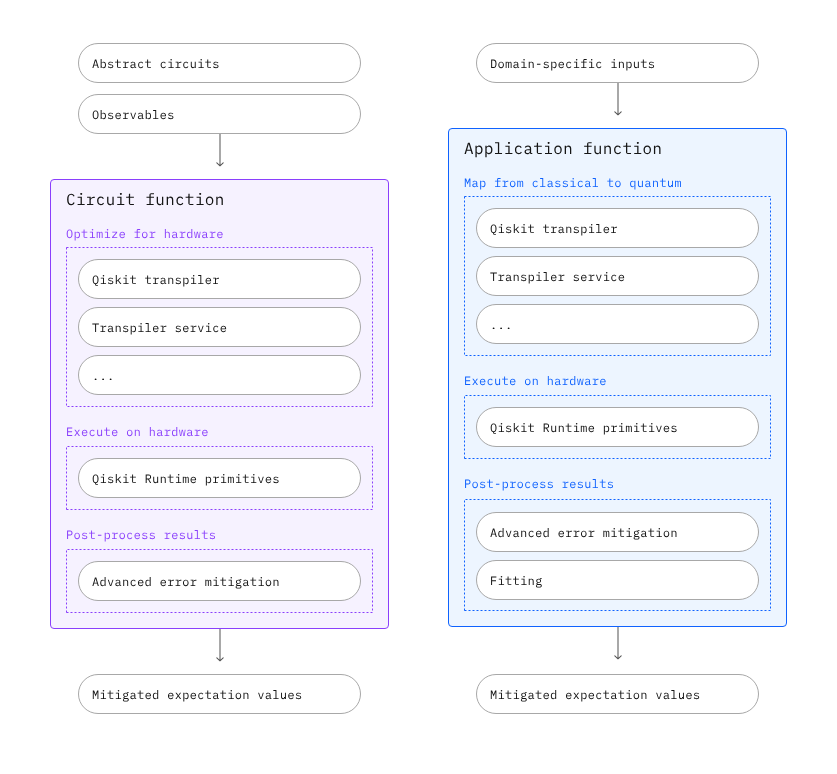

関数には 2 つのタイプがあります。:

| タイプ | 何をするのか? | 入力と出力の例 | 誰のためのものか? |
| - | - | - | - |
| Circuit function | 回路を実行するための簡素化されたインターフェース。トランスパイル、エラー抑制、エラー軽減を抽象化します。| **Input**: 抽象化された `PUB`s <br /> **Output**: 緩和された期待値 | 研究者は、ハードウェアの最適化やエラー処理に重点を置くことなく、Qiskit を使用して新しいアルゴリズムやアプリケーションを発見できます。回路関数を使用して、カスタム アプリケーション関数を構築できます。 |
| Application function | アルゴリズムやドメイン固有のユースケースの探索など、より高レベルのタスクをカバーします。古典的な入力と出力を使用して、タスクを解決するための量子ワークフローを抽象化します。 | **Input**: 分子、グラフ <br /> **Output**: エネルギー、コスト | 非量子領域の研究者は、古典データを量子回路にマッピングする必要なく、既存の大規模な古典ワークフローに量子を統合します。 |


Functionsは IBM® およびサード パーティー パートナーによって提供されます。各Functionsは特定のワークロード特性に合わせてパフォーマンスが調整され、独自のパフォーマンス チューニング オプションがあります。プレミアム プランのユーザーは、IBM Qiskit Functions を無料で使い始めることも、カタログに関数を提供しているパートナーからライセンスを取得することもできます。



## Get started with Qiskit Functions

### Qiskit Functions Catalogクライアントをインストールする

Qiskit Functions の使用を開始するには、IBM Qiskit Functions Catalog クライアントをインストールします。

`pip install qiskit-ibm-catalog`


インストールが完了したら、次のように[IBM Quantum Platform API token](http://quantum.ibm.com/) を使用して認証します。

In [2]:
#!pip install qiskit-ibm-catalog

In [1]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

catalog = QiskitFunctionsCatalog(token='2e3c9b01ed7d8788964de9238b932e9f7828418afa373dd180fcbad2da42ece4513aa23ac879c28ea24a3092cb15f476d24b8920b3d0239fd521f645a72c8f8e')

In [2]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

catalog = QiskitFunctionsCatalog(token='<YOUR_IQP_API_TOKEN>')

オプションとして、 サービスを初期化する前に、 `save_account()` メソッドを使用して資格情報を保存し、後で簡単にアクセスできるようにすることができます。これは `QiskitRuntimeService.save_account()` と同じ場所に認証情報を保存するので、 `QiskitRuntimeService` を使ってアカウントを保存していた場合はこの手順を省略することができる。*アカウントの認証情報はプレーンテキストで保存されるので、信頼できるデバイスを使用している場合のみ、この手順を実行してください。*

In [ ]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

# This can be skipped if you previously did QiskitRuntimeService.save_account()
QiskitFunctionsCatalog.save_account(token="<YOUR_IQP_API_TOKEN>")

認証が完了すると、アクセスできる Qiskit Functionsカタログの関数を一覧表示できます。

In [2]:
catalog.list()

[QiskitFunction(qedma/qesem-dev),
 QiskitFunction(qunasys/quri-chemistry),
 QiskitFunction(qunasys/qce),
 QiskitFunction(algorithmiq/tem),
 QiskitFunction(qunasys/qsci-vqe),
 QiskitFunction(qedma/qesem),
 QiskitFunction(multiverse/singularity),
 QiskitFunction(q-ctrl/performance-management-dev),
 QiskitFunction(qunasys/quri-chemistry-dev),
 QiskitFunction(ibm/circuit-function),
 QiskitFunction(q-ctrl/optimization-solver),
 QiskitFunction(q-ctrl/performance-management),
 QiskitFunction(algorithmiq/tem-dev),
 QiskitFunction(q-ctrl/optimization-solver-dev)]

### 有効な機能を実行する
カタログ オブジェクトがインスタンス化されたら、`catalog.load(provider/function-name)` でfunctionを選択できます


In [3]:
ibm_cf = catalog.load('ibm/circuit-function')

各 Qiskit Function には、カスタム入力、オプション、および出力があります。詳細については、実行するfunctionの特定のドキュメント ページを確認してください。デフォルトでは、すべてのユーザーが一度に実行できるfunctionジョブは 1 つだけです。

In [7]:
job = ibm_cf.run(
    instance=...,
    pubs=[],
    backend="backend_name"
)

job.job_id

0ede4d0f-06d6-4360-86a1-5028ca511b3f


### ジョブステータスを確認する

<Admonition type="tip">
  現在、IBM Quantum ワークロード テーブルには、Qiskit Runtime  ワークロードのみが反映されています。Qiskit Functionワークロードの現在のステータスを確認するには、`job.status()` を使用します。
</Admonition>

Qiskit Function `job_id` を使用すると、実行中のジョブのステータスを確認できます。これには次のステータスが含まれます:

*   **`QUEUED`**: リモート プログラムは Qiskit  Function キューにあります。キューの優先順位は、Qiskit  Functionの使用頻度に基づいて決まります。
    
*   **`INITIALIZING`**: リモート プログラムが起動しています。これには、リモート環境のセットアップと依存関係のインストールが含まれます。

*   **`RUNNING`**: プログラムが実行中です。

*   **`DONE`**:プログラムが完了し、 `job.results()` を使用して結果データを取得できます。

*   **`ERROR`**: 問題のためプログラムの実行が停止しました。  `job.result()` を使用してエラー メッセージを取得します。

*   **`CANCELED`**: プログラムは、ユーザー、サービス、またはサーバーによってキャンセルされました。


In [8]:
job.status()

'DONE'


### 結果を取得

プログラムが  `DONE`になったら、 `job.results()`  を使用して結果を取得できます。この出力形式は関数ごとに異なるため、特定のドキュメントに従ってください。



In [9]:
result = job.result()
print(result)


PubResult(data=DataBin(evs=np.ndarray(<shape=(20,), dtype=float64>), stds=np.ndarray(<shape=(20,), dtype=float64>), evs_noise_factors=np.ndarray(<shape=(20, 3), dtype=float64>), stds_noise_factors=np.ndarray(<shape=(20, 3), dtype=float64>), ensemble_stds_noise_factors=np.ndarray(<shape=(20, 3), dtype=float64>), evs_extrapolated=np.ndarray(<shape=(20, 2, 4), dtype=float64>), stds_extrapolated=np.ndarray(<shape=(20, 2, 4), dtype=float64>), shape=(20,)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {'zne': {'extrapolator': array(['exponential', 'exponential', 'exponential', 'exponential',
       'exponential', 'exponential', 'exponential', 'exponential',
       'exponential', 'exponential', 'exponential', 'exponential',
       'exponential', 'exponential', 'exponential', 'exponential',
       'exponential', 'exponential', 'exponential', 'exponential'],
      dtype='<U11')}, 'layer_noise': {'noise_overhead': 1, 'total_mitigated_layers': 0, '

いつでもジョブをキャンセルすることもできます。


In [10]:
job.stop()

'Job has been stopped.'


### Qiskit Functionsで以前に実行されたジョブを一覧表示する
Qiskit Functions に送信されたすべてのジョブを一覧表示するには、`jobs()` のコマンドを使用できます。


In [11]:
old_jobs = catalog.jobs()
old_jobs

[<Job | 0ede4d0f-06d6-4360-86a1-5028ca511b3f>,
 <Job | abf78e9a-b554-4e38-966a-f99cff877b8c>,
 <Job | 90e1109e-809f-4768-a2dc-f45bf71a97b4>,
 <Job | 313050f2-aa78-4d7d-99f4-44bdfe98e4d7>]


### エラーメッセージを取得する
プログラム ステータスが  `ERROR`の場合、`job.result()`　でデバッグに役立つエラー メッセージを取得します。




In [ ]:
print(job.result())

## 次のステップ

<Admonition type="info" title="Recommendations">

  *   [circuit functionsの探索](./ibm-circuit-function)を使って、新しいアルゴリズムやアプリケーションを構築することができます。

  *   [application functionsの探索](./q-ctrl-optimization-solver) で古典的な入力と出力で、ドメイン固有のタスクを解決します。
</Admonition>
